# Chess (King-Rook vs. King) Data Set

## Problem Statement:-

In this project we are going to perform classification on the chess(King-Rook vs King) Dataset.We are going to use Decision Tree Classifier to perform the classification task.We are going to predict the values of the column named as result in the above mentioned dataset.


# Dataset Description:-

An Inductive Logic Programming (ILP) or relational learning framework is assumed (Muggleton, 1992). The learning system is provided with examples of chess positions described only by the coordinates of the pieces on the board. Background knowledge in the form of row and column differences is also supplied. The relations necessary to form a correct and concise classifier for the target concept must be discovered by the learning system (the examples already provide a complete extensional definition). The task is closely related to Quinlan's (1983) application of ID3 to classify White King and Rook against Black King and Knight (KRKN) positions as lost 2-ply or lost 3-ply. The framework is similar in that the example positions supply only low-grade data. An important difference is that additional background predicates of the kind supplied in the KRKN study via hand-crafted attributes are not provided for this KRK domain.

Chess endgames are complex domains which are enumerable. Endgame databases are tables of stored game-theoretic values for the enumerated elements (legal positions) of the domain. The game-theoretic values stored denote whether or not positions are won for either side, or include also the depth of win (number of moves) assuming minimax-optimal play. From the point of view of experiments on computer induction such databases provide not only a source of examples but also an oracle (Roycroft, 1986) for testing induced rules. However a chess endgame database differs from, say, a relational database containing details of parts and suppliers in the following important respect. The combinatorics of computing the required game-theoretic values for individual position entries independently would be prohibitive. Therefore all the database entries are generated in a single iterative process using the 'standard backup' algorithm (Thompson, 1986).

A KRK database was described by Clarke (1977). The current database was described and used for machine learning experiments in Bain (1992; 1994). It should be noted that our database is not guaranteed correct, but the class distribution is the same as Clarke's database. In (Bain 1992; 1994) the task was classification of positions in the database as won for white in a fixed number of moves, assuming optimal play by both sides. The problem was structured into separate sub-problems by depth-of-win ordered draw, zero, one, ..., sixteen. When learning depth d all examples at depths > d are used as negatives. Quinlan (1994) applied Foil to learn a complete and correct solution for this task.

The typical complexity of induced classifiers in this domain suggest that the task is demanding when background knowledge is restricted.



## Attribute Information:-

1. White King file (column)
2. White King rank (row)
3. White Rook file
4. White Rook rank
5. Black King file
6. Black King rank
7. optimal depth-of-win for White in 0 to 16 moves, otherwise drawn {draw, zero, one, two, ..., sixteen}.



## We will be implementing the following steps to achieve the final result:-

1. Importing the Libraries
2. Importing the dataset
3. Exploratory Data Analysis
4. Feature Engineering
5. Building the model
6. Evaluating the model

## Step-1: Importing the Libraries:-


In [1]:
# import numpy as np for processing data
import numpy as np

# import pandas as pd for importing the data and working with data
import pandas as pd

# import matplotlib.pyplot as plt for visualisation
import matplotlib.pyplot as plt

# import seaborn as sns for data visualization
import seaborn as sns

## Step-2: Importing the dataset:-

In [2]:
# Using pd.read_csv(dataaset) importing the dataset
dataset=pd.read_csv('chess_king_rook_dataset.csv')

## Seeing the dataset:-

In [3]:
# Using data.head() seeing the dataset
dataset.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


## Step-3: Exploratory Data Analysis:-

It is common for data scientists to spend a majority of their time exploring and cleaning data, but approaching this as an opportunity to invest in your model (instead of viewing it as just another chore on your to-do list) will yield big dividends later on in the data science process.

Performing thorough exploratory data analysis (EDA) and cleaning the dataset are not only essential steps, but also a great opportunity to lay the foundation for a strong machine learning model.

## Seeing the shape and size of the dataset:-

In [4]:
# Using data.shape and data.size seeing the shape and size of the dataset
print(dataset.shape)
print(dataset.size)

(28056, 7)
196392


## Describing the dataset:-

In [5]:
# Using data.describe() describing the dataset
dataset.describe()

,white_king_rank,white_rook_rank,black_king_rank
count,28056.000000,28056.000000,28056.000000
mean,1.854006,4.512404,4.451811
std,0.926414,2.282723,2.248387
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


## Seeing the non null values in the dataset:-

In [6]:
# Using data.info() seeing the non null values in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   white_king_file  28056 non-null  object
 1   white_king_rank  28056 non-null  int64 
 2   white_rook_file  28056 non-null  object
 3   white_rook_rank  28056 non-null  int64 
 4   black_king_file  28056 non-null  object
 5   black_king_rank  28056 non-null  int64 
 6   result           28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


## Seeing the list of all the columns in the dataset:-

In [7]:
# Using data.columns seeing the list of all the columns in the dataset
print(dataset.columns)

Index(['white_king_file', 'white_king_rank', 'white_rook_file',
       'white_rook_rank', 'black_king_file', 'black_king_rank', 'result'],
      dtype='object')


## Seeing the null values in the dataset:-

In [8]:
# Using data.isnull().sum() seeing all the null values present in the dataset
dataset.isnull().sum()

white_king_file    0
white_king_rank    0
white_rook_file    0
white_rook_rank    0
black_king_file    0
black_king_rank    0
result             0
dtype: int64

## Visualising the data using seaborn library

There are different types of plots like bar plot, box plot, scatter plot etc.

Scatter plot is very useful when we are analyzing the relation ship between 2 features on x and y axis.

In seaborn library we have pairplot function which is very useful to scatter plot all the features at once instead of plotting them individually.


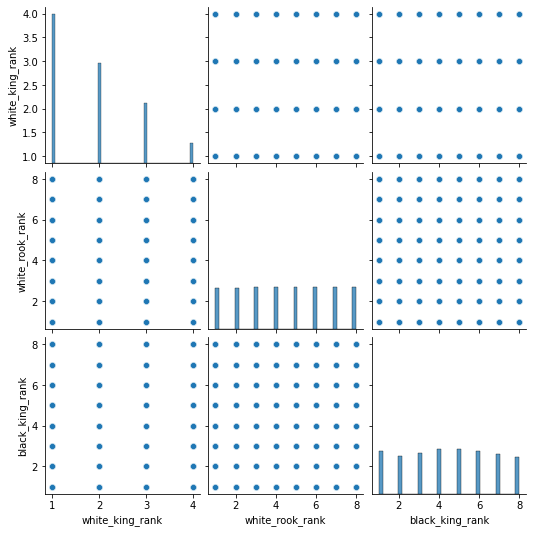

In [9]:
# Seeing the pairplot using sns.pairplot(data)
sns.pairplot(dataset.iloc[:,:-1])

<AxesSubplot:>

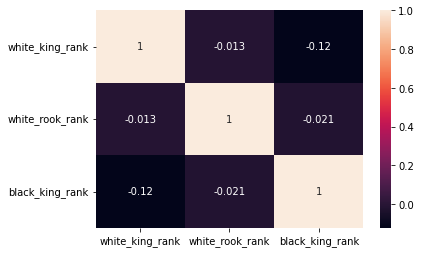

In [10]:
# Seeing the heatmap using sns.heatmap(data.corr(),annot=True)
sns.heatmap(dataset.corr(),annot=True)

## Step-4: Feature Engineering



## Label Encoding:-

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human readable form, the training data is often labeled in words.

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

Limitation of label Encoding:-
Label encoding convert the data in machine readable form, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issue in training of data sets. A label with high value may be considered to have high priority than a label having lower value.

Example:-

An attribute having output classes mexico, paris, dubai. On Label Encoding this column, let mexico is replaced with 0 , paris is replaced with 1 and dubai is replaced with 2.
With this, it can be interpreted that dubai have high priority than mexico and paris while training the model, But actually there is no such priority relation between these cities here.

In [11]:
# from sklearn.preprocessing import LabelEncoder for performing Label Encoding
from sklearn.preprocessing import LabelEncoder
lbl_white_king=LabelEncoder()
dataset['white_king_file']=lbl_white_king.fit_transform(dataset['white_king_file'])
lbl_white_rook=LabelEncoder()
dataset['white_rook_file']=lbl_white_rook.fit_transform(dataset['white_rook_file'])
lbl_black_king=LabelEncoder()
dataset['black_king_file']=lbl_black_king.fit_transform(dataset['black_king_file'])
lbl_result=LabelEncoder()
dataset['result']=lbl_result.fit_transform(dataset['result'])

## Breaking the data into feature variables and target:-

In [12]:
# Using data.iloc[:,:-1].values we get the feature variables
x=dataset.iloc[:,:-1].values

# Using data.iloc[:,-1].values we get the target variable
y=dataset.iloc[:,-1].values

## Dividing the dataset into test and train data:-

In [13]:
# we can divide the data into train and test data using train_test_split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

## Step-5: Building the model:-

We will be using Decision Tree Classifier for performing the classification task.



## Decision Tree Classifier:-

Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached.

The decision tree classifiers organized a series of test questions and conditions in a tree structure.In the decision tree, the root and internal nodes contain attribute test conditions to separate recordes that have different characteristics. All the terminal node is assigned a class lable Yes or No.

Once the decision tree has been constructed, classifying a test record is straightforward. Starting from the root node, we apply the test condition to the record and follow the appropriate branch based on the outcome of the test. It then lead us either to another internal node, for which a new test condition is applied, or to a leaf node. When we reach the leaf node, the class lable associated with the leaf node is then assigned to the record.

The decision tree induction algorithm works by recursively selecting the best attribute to split the data and expanding the leaf nodes of the tree until the stopping cirterion is met. The choice of best split test condition is determined by comparing the impurity of child nodes and also depends on which impurity measurement is used. After building the decision tree, a tree-prunning step can be performed to reduce the size of decision tree. Decision trees that are too large are susceptible to a phenomenon known as overfitting. Pruning helps by trimming the branches of the initail tree in a way that improves the generalization capability of the decision tree.

In [14]:
# We can import DecsisonTreeClassifer from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Now we need to create an object for the DecisionTreeClassifier
model=DecisionTreeClassifier()

# Use model.fit(x_train,y_train) to train the model 
model.fit(x_train,y_train)

# Using model.predict(x_test) we will be predicting the values
y_predict=model.predict(x_test)

## Step-5: Evaluating the model:-

We will be evaluating the model using confusion matrix and accuracy_score:
 
### Confusion Matrix:-
 
When we get the data, after data cleaning, pre-processing and wrangling, the first step we do is to feed it to an outstanding model and of course, get output in probabilities. But hold on! How in the hell can we measure the effectiveness of our model. Better the effectiveness, better the performance and that’s exactly what we want. And it is where the Confusion matrix comes into the limelight. Confusion Matrix is a performance measurement for machine learning classification.
 
 
What is Confusion Matrix and why you need it?
Well, it is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

Related Terminologies:-

True Positive:
Interpretation: You predicted positive and it’s true.

True Negative:
Interpretation: You predicted negative and it’s true.

False Positive: (Type 1 Error)
Interpretation: You predicted positive and it’s false.

False Negative: (Type 2 Error)
Interpretation: You predicted negative and it’s false.

### Accuracy Score:-

Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

In [15]:
# We can import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_predict)
print(confusion)

# We can import accuracy score from sklearn.metrics
print(model.score(x_test,y_test))

[[532   7  23  17   2   0  13   9   0  11   4  15  11  23   0  31   1   1]
 [  4 282   3   0   0   0   3  28   1  12   1   0   7   5   0   3   0   0]
 [ 18   3 598   1   2   0   1  15   0   0   0   0  31   8   0  40   0   0]
 [ 12   0   0 481   0   0  44   0   0   0   0   9   2   5   0   0   0   0]
 [  2   1   0   0 103   5   0   1   1   0   4   0   0   0   1   0   2   0]
 [  2   0   0   0   0  50   0   0   0   0   5   0   0   0   3   0   0   0]
 [ 19   0   2  40   0   0 977   0   0   0   0   1   1  77   0  10   0   0]
 [  9  24  15   0   0   0   0 362   0   4   1   0  24   1   0   4   0   0]
 [  1   0   0   0   0   0   0   0  19   0   1   0   0   0   0   0   0   0]
 [  7   6   0   0   3   0   0   1   1 127  10   0   0   0   0   0   0   0]
 [  3   5   0   0   3   3   0   2   0   5 111   0   1   0   0   0   0   0]
 [  9   0   0   6   0   0   0   0   0   0   0  69   0   0   0   0   0   0]
 [ 14  12  32   1   0   0   1  17   0   3   0   0 424   5   0  13   0   0]
 [ 26   1  10   8   0   0